### **Nesse Projeto irei prever se uma pessoa irá desenvolver Diabetes**

#### **Primeiros Passos:**
* Definir as Fontes de Dados;
* Compreender os Atributos dos Dados coletados;
* Selecionar as Ferramentas de Análise mais adequadas;
* Definir o resultado esperado. Neste caso: Verdadeiro ou Falso;
* Definir o Nível de Acurácia: 70% de Precisão.

#### Fonte dos Dados:
* **Conjunto de Dadso do Repositório de Machine Learning do Kaggle
* https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

#### Compreender os Atributos dos Dadso Coletados:

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* Carregando os Dados

In [2]:
df = pd.read_csv('pima-data.csv')

In [3]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [4]:
# Verificando o Shape do Dataframe
df.shape

(768, 10)

* Verificando se há Valores Nunos, ou Inexistentes

In [5]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [6]:
# Definindo a Função que retorna um mapa de calor responsável por indicar a correlação entre as vriáveis

def df_corr(df, size = 20):
    corr = df.corr()
    sns.set(font_scale = 1.3)
    plt.figure(figsize = (size,size*0.85))
    sns.heatmap(corr)
    plt.show()

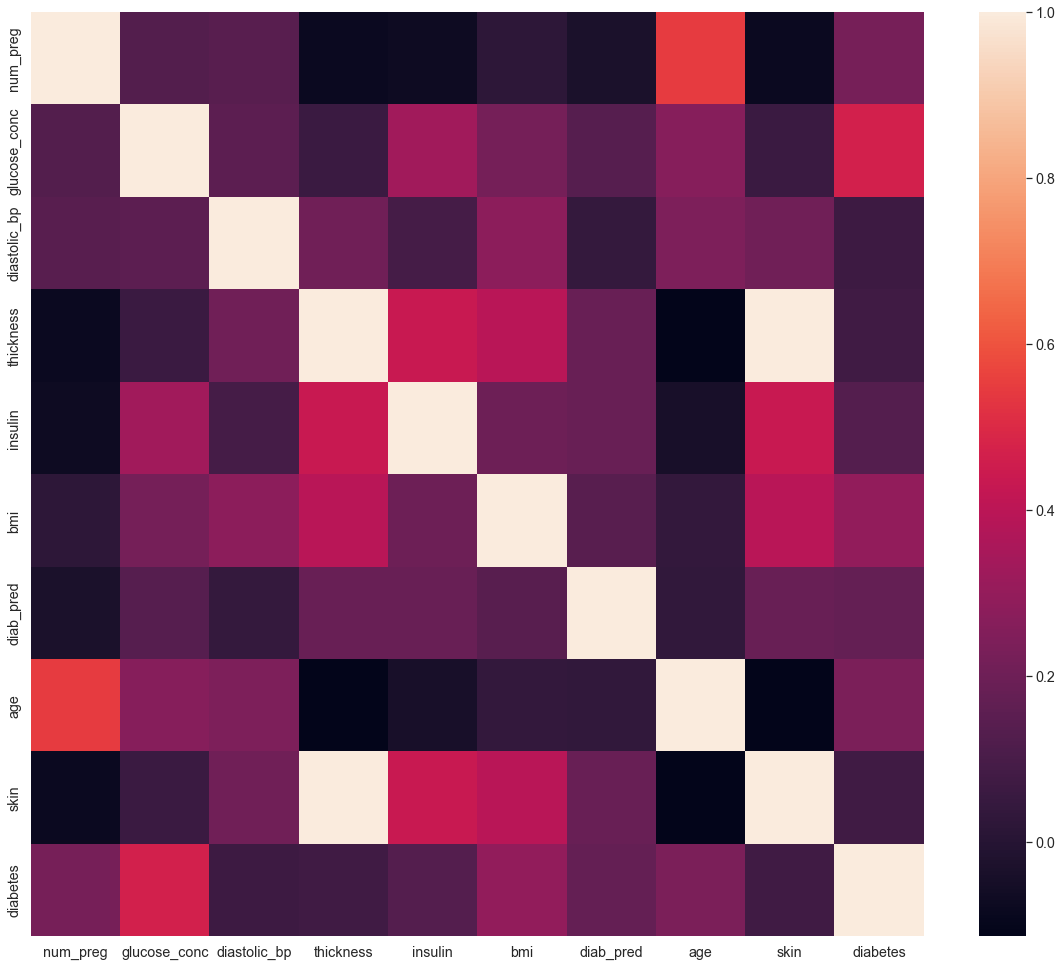

In [7]:
df_corr(df)

### Pra que serve esse Gráfico?
* Ele representa a correlação entre as variáveis;
* Quanto mais clara for a cor, mais positiva é a correlação entre as duas variáveis que se encontram naquela coordenada;
* Uma correlação positiva entre duas variáveis, significa que quando uma aumenta o valor, a outra acompanha;
* Uma correlação negativa é ao contrário;
* Uma correlação neutra é quando a variação de uma variável, não interfere na variação da outra variável.

## Variáveis que eu achei relevante:
* thicness e skin - O aumento de uma influencia grandemente no aumento da outra, e vice-versa;

*Partindo do princípio que as duas acima possuem uma alta correlação, eu quero observar outras variáveis que também tem correlação positiva com elas, pois isso ira ressaltar um aglomerado de variáveis que possuem correlação entre si.*

* thickness - skin
* skin - thickness
* bmi - thicness
* insulin - thicness
* glucose_conc - insulin
* diastolic_bp - bmi
* age - glucose_con
* num_preg - age

In [8]:
# Mapeando o Dataset e Trocando valores True por 1, e valores False por 0.
df['diabetes'] = df['diabetes'].map({True:1, False:0})

In [9]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [10]:
# verificando como os dados estão distribuídos.
diabetes_positiva = df.loc[df['diabetes'] == True]
diabetes_negativa = df.loc[df['diabetes'] == False]
print(f'''Casos Positivos: {len(diabetes_positiva)}\nCasos Negativos: {len(diabetes_negativa)}''')

Casos Positivos: 268
Casos Negativos: 500


* A informação acima é muito relevante, pois sabemos que existem poucos dados para se trabalhar
* Temos muitos exemplos de casos Negativos de Diabetes;
* Temos poucos exemplos (quase metade) de casos Positivos de Diabetes.

**Como este projeto trata-se apenas de um estudo, continuarei mesmo assim.**
* Lembrando que numa situação real, o correto seria correr atrás de mais dados, pois este é um assunto muito delicado para ser tratado de qualquer maneira.

In [11]:
# Selecionando as Variáveis preditorias.
# Eu já as separei, conforme pode ser observado a algumas linhas de código acima.
atributos = ['thickness', 'skin', 'bmi', 'insulin', 'glucose_conc', 'diastolic_bp', 'age', 'num_preg']

In [12]:
# Variável a ser prevista, neste caso, a diagnosticação de Diabetes.
atributo_previsto = ['diabetes']

In [13]:
# Definindo x e y - x, representa as Variáveis Preditoras - y representa a Variável as ser Prevista.
x = df[atributos].values
y = df[atributo_previsto].values

In [14]:
x

array([[35.    ,  1.378 , 33.6   , ..., 72.    , 50.    ,  6.    ],
       [29.    ,  1.1426, 26.6   , ..., 66.    , 31.    ,  1.    ],
       [ 0.    ,  0.    , 23.3   , ..., 64.    , 32.    ,  8.    ],
       ...,
       [23.    ,  0.9062, 26.2   , ..., 72.    , 30.    ,  5.    ],
       [ 0.    ,  0.    , 30.1   , ..., 60.    , 47.    ,  1.    ],
       [31.    ,  1.2214, 30.4   , ..., 70.    , 23.    ,  1.    ]])

In [15]:
y[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

## Dividindo os Dados entre Dados para Treino e Dados para Teste
* Dados para Treino é 70%, quanto mais dados para treinar, melhor.
* Dados para Teste é 30%, é necessário que uma parcela dos dados seja usada para teste. Devemos fazer Testes para comprovar a eficiência do Modelo criado.

In [16]:
import sklearn as sk
from sklearn.model_selection import train_test_split as tts

In [17]:
sk.__version__

'1.1.2'

In [18]:
test_size = 0.3

In [19]:
# criando os dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = tts(x, y, test_size = test_size, random_state = 42)

**A Porcentagem está aproximadamente 70/30, conforme o esperado.**

In [20]:
print(f'x_teste = {round(len(x_teste)/len(df) * 100, 2)}%')
print(f'x_treino = {round(len(x_treino)/len(df) * 100, 2)}%')

x_teste = 30.08%
x_treino = 69.92%


**Embora o Dataset tenha sido dividido, a proporção de Diabetes Positiva e Diabetes Negativa continuam as mesmas**

In [21]:
print(f'y_treino Positiva: {len(y_treino[y_treino[:] == 1])} - {round(len(y_treino[y_treino[:] == 1])/len(y_treino) *100,2)}%')
print(f'y_treino Negativa: {len(y_treino[y_treino[:] == 0])} - {round(len(y_treino[y_treino[:] == 0])/len(y_treino) *100,2)}%')
print()
print(f'y_teste Positiva: {len(y_teste[y_teste[:] == 1])} - {round(len(y_teste[y_teste[:] == 1])/len(y_teste) *100,2)}%')
print(f'y_teste Negativa: {len(y_teste[y_teste[:] == 0])} - {round(len(y_teste[y_teste[:] == 0])/len(y_teste) *100,2)}%')

y_treino Positiva: 188 - 35.01%
y_treino Negativa: 349 - 64.99%

y_teste Positiva: 80 - 34.63%
y_teste Negativa: 151 - 65.37%


## Valores Missing Ocultos
* Embora eu já tenha atestado que não existem valores Nulos, isso não significa que o meu Dataset está livre de Valores Missing (Valores Faltantes);
* O Dataset pode conter valores que comprometem a análise correta da situação;
* Caso haja valores igual a zero em alguma coluna, eu vou me perguntar se aquele valor faz sentido;
    * Se fizer sentido, está ótimo. Mas se não fizer, eu tenho que fazer algo a respeito.
    * A final um valor incorreto irá comprometer a análiza, e consequentemente, o resultado.

In [22]:
total_dados = len(df) * len(df.columns)
zeros = 0
print('\n\nTotal de Zeros que Cada coluna possui:\n')
for i in df.columns:
    print(f'{i}: {len(df[df[i] == 0])}')
    zeros += len(df[df[i] == 0])

print('----------------------------')
print(f'Total de Dados: {total_dados}')
print(f'Total de Zeros: {zeros}')
print(f'Porcentagem de Zeros: {round((zeros/total_dados)*100,2)}%\n')



Total de Zeros que Cada coluna possui:

num_preg: 111
glucose_conc: 5
diastolic_bp: 35
thickness: 227
insulin: 374
bmi: 11
diab_pred: 0
age: 0
skin: 227
diabetes: 500
----------------------------
Total de Dados: 7680
Total de Zeros: 1490
Porcentagem de Zeros: 19.4%



* Como informado acima, aproximadamente 19.4% de todos os valores disponíveis são formados por Zero;
* Isso obviamente é preocumante, uma vez que, por exemplo, não é possível que 374 das pessoas que fizeram os exames tinham absolutamente 0 de Insulina. Esta informação claramente está errada, então irei corrigi-la.

## Tratando Valores Missing
* Irei substituir os valores iguais a zero pela média dos valores de cada variável.

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imp = SimpleImputer(missing_values=0., strategy = 'mean')

In [25]:
# Substituindo os valores iguais a zero, pela média dos Dados.
x_treino_t = imp.fit_transform(x_treino)
x_teste_t = imp.fit_transform(x_teste)

## Construindo e Treinando o Modelo

In [26]:
# Importando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [27]:
# Criando o modelo Preditivo
modelo_v1 = GaussianNB()

In [28]:
# trainando o modelo
modelo_v1.fit(x_treino_t, y_treino.ravel())

GaussianNB()

## Verifivcando a Exatidão do Modelo

In [29]:
from sklearn import metrics

* Testando a Exatidão com os Dados de Treino

In [30]:
v1_predict_treino = modelo_v1.predict(x_treino_t)

In [31]:
print(f'Exatidão (Accuracy): {round(metrics.accuracy_score(y_treino, v1_predict_treino),4)*100}%')

Exatidão (Accuracy): 75.98%


* Testando a Exatidão com os Dados de Teste

In [32]:
v1_predict_teste = modelo_v1.predict(x_teste_t)

In [33]:
print(f'Exatidão (Accuracy): {round(metrics.accuracy_score(y_teste, v1_predict_teste),4)*100}%')

Exatidão (Accuracy): 71.0%


## Métricas

In [37]:
# Criando uma Confusion Matrix
metrics.confusion_matrix(y_teste, v1_predict_teste, labels = [1,0])

array([[ 49,  31],
       [ 36, 115]], dtype=int64)

In [38]:
# criando uma Classification Report
metrics.classification_report(y_teste, v1_predict_teste, labels = [1,0])

'              precision    recall  f1-score   support\n\n           1       0.58      0.61      0.59        80\n           0       0.79      0.76      0.77       151\n\n    accuracy                           0.71       231\n   macro avg       0.68      0.69      0.68       231\nweighted avg       0.71      0.71      0.71       231\n'

## Mudando o Algorítimo para RandomForest
* Mudando o Algorítimo podemos verificar se o nível de Acurácia irá aumentar, ou não;
* Fazemos isso na tentativa de otimizar nosso modelo.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
modelo_v2 = RandomForestClassifier(random_state = 42)

In [41]:
modelo_v2.fit(x_treino_t, y_treino.ravel())

RandomForestClassifier(random_state=42)

## Verificando a Exatidão do Modelo

* Testando a Exatidão com os dados de Treino

In [42]:
v2_predict_treino = modelo_v2.predict(x_treino_t)

In [43]:
print(f'Exatidão (Accuracy): {metrics.accuracy_score(y_treino, v2_predict_treino)*100}%')

Exatidão (Accuracy): 100.0%


* Testando a Exatidão com os dados de Teste

In [44]:
v2_predict_teste = modelo_v2.predict(x_teste_t)

In [45]:
print(f'Exatidão (Accuracy): {round(metrics.accuracy_score(y_teste, v2_predict_teste)*100,2)}%')

Exatidão (Accuracy): 73.59%


## Métricas

In [46]:
# Criando uma Confusion Matrix
metrics.confusion_matrix(y_teste, v2_predict_teste, labels = [1,0])

array([[ 51,  29],
       [ 32, 119]], dtype=int64)

In [47]:
# criando uma Classification Report
metrics.classification_report(y_teste, v2_predict_teste, labels = [1,0])

'              precision    recall  f1-score   support\n\n           1       0.61      0.64      0.63        80\n           0       0.80      0.79      0.80       151\n\n    accuracy                           0.74       231\n   macro avg       0.71      0.71      0.71       231\nweighted avg       0.74      0.74      0.74       231\n'

## Algorítimo LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
# Terceira versão do Modelo usando LogistcRegression
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42, max_iter = 1000)
modelo_v3.fit(x_treino_t,y_treino.ravel())

LogisticRegression(C=0.7, max_iter=1000, random_state=42)

In [50]:
v3_predict_teste = modelo_v3.predict(x_teste_t)

In [51]:
print(f'Exatidão (Accuracy): {round(metrics.accuracy_score(y_teste, v3_predict_teste)*100,2)}')

Exatidão (Accuracy): 73.16


## Resumo

In [52]:
def accuracy(modelo, saida = y_teste):
    return round(metrics.accuracy_score(y_teste, modelo)*100,2)

In [53]:
algoritimos_testados = dict(
    [('GaussianNB', [v1_predict_teste, modelo_v1]),
     ('RandomForestClassifier', [v2_predict_teste, modelo_v2]),
     ('LogisticRegression', [v3_predict_teste, modelo_v2])])

In [54]:
for i in algoritimos_testados.keys():
    print(f'Modelo usando o Algorítimo {i} - Accuracy: {accuracy(algoritimos_testados[i][0])}%')
    algoritimos_testados[i].append(accuracy(algoritimos_testados[i][0]))

Modelo usando o Algorítimo GaussianNB - Accuracy: 71.0%
Modelo usando o Algorítimo RandomForestClassifier - Accuracy: 73.59%
Modelo usando o Algorítimo LogisticRegression - Accuracy: 73.16%


* Determinando o Melhor Modelo

In [55]:
melhor_modelo = []
for i in algoritimos_testados.keys():
    if len(melhor_modelo) == 0:
        melhor_modelo.append(i)
        melhor_modelo.append(algoritimos_testados[i][0])
        melhor_modelo.append(algoritimos_testados[i][1])
        melhor_modelo.append(algoritimos_testados[i][2])
    if melhor_modelo[3] < algoritimos_testados[i][2]:
        melhor_modelo = [i, algoritimos_testados[i][0], algoritimos_testados[i][1], algoritimos_testados[i][2]]

In [56]:
melhor_modelo

['RandomForestClassifier',
 array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64),
 RandomForestClassifier(random_state=42),
 73.59]

## Fazendo Prevsões com o Melhor Modelo Treinado

In [57]:
import pickle

In [58]:
# salvando o modelo para usar mais tarde
filename = 'melhor_modelo.sav'
pickle.dump(melhor_modelo[2], open(filename, 'wb'))

In [59]:
x_teste_t

array([[33.        ,  1.3002    , 34.        , ..., 58.        ,
        43.        ,  6.        ],
       [32.        ,  1.2608    , 35.7       , ..., 75.        ,
        21.        ,  2.        ],
       [30.37974684,  1.19696203, 30.8       , ..., 64.        ,
        21.        ,  2.        ],
       ...,
       [37.        ,  1.4578    , 36.3       , ..., 80.        ,
        23.        ,  4.85714286],
       [32.        ,  1.2608    , 30.8       , ..., 70.        ,
        37.        ,  6.        ],
       [41.        ,  1.6154    , 35.8       , ..., 82.        ,
        35.        ,  5.        ]])

In [89]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados
modelo_carregado = pickle.load(open(filename, 'rb'))
result1 = modelo_carregado.predict(x_teste_t[15].reshape(1,-1))
result2 = modelo_carregado.predict(x_teste_t[18].reshape(1,-1))

In [90]:
print(result1, y_teste[15])
print(result2, y_teste[18])

[0] [1]
[1] [1]
